
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
path='../../Iowa_Liquor_sales_sample_10pct.csv'
## Load the data into a DataFrame
# pd.read_csv()

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(path)
#Drop columns I wont be working with
df=df.drop(['Volume Sold (Gallons)', 'Item Number', 'Category'], axis=1)
df.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,APRICOT BRANDIES,55,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,BLENDED WHISKIES,395,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,STRAIGHT BOURBON WHISKIES,65,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0


In [2]:
#Convert prices to numericals
# assert (len(df[df['State Bottle Cost'].str[0]!='$'])==0)
# assert (len(df[df['State Bottle Cost'].str[0]!='$'])==0)
# assert (len(df[df['State Bottle Cost'].str[0]!='$'])==0)
df['Sale (Dollars)']=df['Sale (Dollars)'].str[1:]
df['Sale (Dollars)']=df['Sale (Dollars)'].astype(float)
df['State Bottle Cost']=df['State Bottle Cost'].str[1:]
df['State Bottle Cost']=df['State Bottle Cost'].astype(float)
df['State Bottle Retail']=df['State Bottle Retail'].str[1:]
df['State Bottle Retail']=df['State Bottle Retail'].astype(float)
#Convert Date to Datetime
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)
df[df['Date'].dt.year==2015] #Filter out to only 2015 sales for the sake of consistency

,Date,Store Number,City,Zip Code,County Number,County,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,APRICOT BRANDIES,55,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,VODKA 80 PROOF,297,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,AMERICAN DRY GINS,205,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,AMERICAN GRAPE BRANDIES,85,Korbel Brandy,750,6.66,9.99,3,29.97,2.25
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,CANADIAN WHISKIES,65,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,CINNAMON SCHNAPPS,65,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00
10,2015-09-28,2648,WEST DES MOINES,50265,77.0,Polk,SINGLE BARREL BOURBON WHISKIES,65,Knob Creek Single Barrel Reserve,750,26.24,39.36,6,236.16,4.50
11,2015-10-28,2600,OSKALOOSA,52577,62.0,Mahaska,AMERICAN COCKTAILS,55,Chi-Chi's Margarita W/tequila,1750,6.00,9.25,6,55.50,10.50
12,2015-01-22,3858,DAVENPORT,52806,82.0,Scott,CANADIAN WHISKIES,65,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,1.75
15,2015-06-10,3717,SUMNER,50674,9.0,Bremer,APRICOT BRANDIES,55,Mr. Boston Apricot Brandy,750,4.50,6.75,4,27.00,3.00


In [3]:
#These zip codes were incorrectly entered
df['Zip Code'].replace('712-2', '51529', inplace=True)
df['Zip Code']=df['Zip Code'].astype(int)

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [4]:
#Numerical Parameters: Volume Sold (Gallons), Volue Sold (Liters), Sale (Dollars), Bottles Sold, State Bottle Retail
# : State Bottle Cost, Bottle Volume (ml), Date
#Categorical: Item Description, Item Number, Category Name, Category, County, County Number, Zip Code, City, Store Number
# df['County Number'].value_counts()
# df['County Number'].value_counts().index
df.describe(include='all')

,Date,Store Number,City,Zip Code,County Number,County,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
count,270955,270955.000000,270955,270955.000000,269878.000000,269878,270323,270955.00000,270955,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
unique,274,NaN,385,NaN,NaN,99,71,NaN,2173,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-12-01 00:00:00,NaN,DES MOINES,NaN,NaN,Polk,VODKA 80 PROOF,NaN,Black Velvet,NaN,NaN,NaN,NaN,NaN,NaN
freq,1555,NaN,23724,NaN,NaN,49102,35373,NaN,7233,NaN,NaN,NaN,NaN,NaN,NaN
first,2015-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3590.263701,NaN,51264.417663,57.231642,NaN,NaN,256.43443,NaN,924.830341,9.773281,14.675760,9.871285,128.902375,8.981351
std,NaN,947.662050,NaN,988.539486,27.341205,NaN,NaN,141.01489,NaN,493.088489,7.047119,10.570145,24.040912,383.027369,28.913690
min,NaN,2106.000000,NaN,50002.000000,1.000000,NaN,NaN,10.00000,NaN,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000
25%,NaN,2604.000000,NaN,50315.000000,31.000000,NaN,NaN,115.00000,NaN,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000


In [5]:
## df.groupby('Store Number')['Volume Sold (Liters)'].sum().sort_values(ascending=False)
# df.groupby('Item Description')['Volume Sold (Liters)'].sum().sort_values(ascending=False)
# df.groupby('Store Number')['Sale (Dollars)'].sum().sort_values(ascending=False)
#df.groupby('County')['Sale (Dollars)'].sum().sort_values(ascending=False)
#df.groupby('Weekday')['Sale (Dollars)'].sum()
#df[(df['Vendor Number']==65)]
#AGGREGATE DATA BY COUNTY
#
total_sales=df['Sale (Dollars)'].sum()
# county_series=df.groupby('County')['Sale (Dollars)'].sum().sort_values(ascending=False)
# county_sales=pd.DataFrame(county_series.values, index=county_series.index, columns=['Total Sales'])
# county_sales['% of Total']=county_sales['Total Sales']/total_sales*100

In [6]:
#Check if Zip Code is consistent across all entries for the same store
# c=True
# for _ in df.groupby('Store Number')['Zip Code'].unique().values:
#     if len(_)!=1:
#         c=False
#True
#df[df['County']=='Black Hawk'].groupby('Store Number')['Sale (Dollars)'].sum().sort_values(ascending=False)

In [7]:
import numpy as np
store_series=df.groupby('Store Number')['Sale (Dollars)'].sum().sort_values(ascending=False)
store_sales=pd.DataFrame(store_series.values, index=store_series.index, columns=['Total Sales'])
#Create new dataframe for aggregate data on a store-by-store basis
store_sales['% of Total']=store_sales['Total Sales']/total_sales*100
store_sales.reset_index(inplace=True)
#Make store number a separate column, Sort by total sales
def store_zip(store_number):
    return df[df['Store Number']==store_number].iloc[0]['Zip Code']
def store_bottles(store_number):
    return df[df['Store Number']==store_number]['Bottles Sold'].values.sum()
def store_variety(store_number):
    return len(df[df['Store Number']==store_number]['Item Description'].unique())
def bottle_size(store_number):
    return np.average(df[df['Store Number']==store_number]['Bottle Volume (ml)'], weights=df[df['Store Number']==store_number]['Bottles Sold'])
def store_bestseller(store_number):
    return df[df['Store Number']==store_number].groupby('Item Description')['Bottles Sold'].sum().sort_values(ascending=False).index[0]
def ppbottle(store_number):
    return np.average(df[df['Store Number']==store_number]['State Bottle Retail'], weights=df[df['Store Number']==store_number]['Bottles Sold'])
store_sales['Zip']=store_sales['Store Number'].apply(store_zip)
store_sales['Bottles Sold']=store_sales['Store Number'].apply(store_bottles)
store_sales['Variety']=store_sales['Store Number'].apply(store_variety) #Unique items being sold by the store
store_sales['Avg Bottle Size']=store_sales['Store Number'].apply(bottle_size) #weighted avg of bottle size bought by 1 store
store_sales['Best Seller']=store_sales['Store Number'].apply(store_bestseller)
store_sales['Avg Ppbottle']=store_sales['Store Number'].apply(ppbottle)

In [8]:
zip_series=df.groupby('Zip Code')['Sale (Dollars)'].sum().sort_values(ascending=False)
zip_sales=pd.DataFrame(zip_series.values, index=zip_series.index, columns=['Total Sales'])
zip_sales.reset_index(inplace=True)
def zip_avgsales(zcode):
    return store_sales[store_sales['Zip']==zcode]['Total Sales'].mean()
def median_nearby(zcode):
    return df[df['Zip Code']==zcode].groupby('Store Number')['Sale (Dollars)'].sum().median()
def in_zip(zcode):
    return len(store_sales[store_sales['Zip']==zcode])
def total_sold_nearby(zcode):
    return df[df['Zip Code']==zcode]['Sale (Dollars)'].sum()
def avg_ppbottle(zcode):
    return np.average(df[df['Zip Code']==zcode]['State Bottle Retail'], weights=df[df['Zip Code']==zcode]['Bottles Sold'])
def total_bottles(zcode):
    return df[df['Zip Code']==zcode]['Bottles Sold'].sum()
zip_sales['Median Sales Nearby']=zip_sales['Zip Code'].apply(median_nearby)
zip_sales['Total Sales Nearby']=zip_sales['Zip Code'].apply(total_sold_nearby)
zip_sales['Avg Sales Nearby']=zip_sales['Zip Code'].apply(zip_avgsales)
zip_sales['# Stores Nearby']=zip_sales['Zip Code'].apply(in_zip) 
zip_sales['Avg Price Per Bottle']=zip_sales['Zip Code'].apply(avg_ppbottle)
zip_sales['# Bottles Sold']=zip_sales['Zip Code'].apply(total_bottles)
zip_sales

,Zip Code,Total Sales,Median Sales Nearby,Total Sales Nearby,Avg Sales Nearby,# Stores Nearby,Avg Price Per Bottle,# Bottles Sold
0,50314,1336470.16,37339.830,1336470.16,222745.026667,6,14.781673,90414
1,50320,1306281.74,8003.340,1306281.74,145142.415556,9,15.377428,84948
2,52402,1171002.49,9721.865,1171002.49,39033.416333,30,12.904604,90743
3,52240,1083845.19,10759.450,1083845.19,54192.259500,20,13.243627,81839
4,50010,932695.71,11284.760,932695.71,44414.081429,21,14.387901,64825
5,52807,735109.35,23678.100,735109.35,81678.816667,9,14.588977,50388
6,51501,714195.06,6738.745,714195.06,27469.040769,26,13.236129,53958
7,50311,692932.41,37956.120,692932.41,98990.344286,7,14.514105,47742
8,50266,678653.20,8872.290,678653.20,42415.825000,16,17.881411,37953
9,52722,674667.22,9116.020,674667.22,56222.268333,12,15.252921,44232


In [9]:
store_sales

,Store Number,Total Sales,% of Total,Zip,Bottles Sold,Variety,Avg Bottle Size,Best Seller,Avg Ppbottle
0,2633,1220335.09,3.493985,50320,76756,597,989.127886,Juarez Tequila Gold,15.898889
1,4829,1089152.87,3.118392,50314,65719,556,966.006786,Barton Vodka,16.572876
2,2512,532265.62,1.523949,52240,35679,636,936.069537,Barton Vodka,14.918177
3,3385,506589.09,1.450433,52402,31737,232,1141.648549,Barton Vodka,15.962098
4,3420,402576.06,1.152630,50311,23784,148,1204.843592,Barton Vodka,16.926340
5,3952,392451.43,1.123642,52722,22754,322,955.667135,Captain Morgan Spiced Rum,17.247580
6,3814,310536.40,0.889108,50266,13388,58,1213.960263,Titos Handmade Vodka,23.195130
7,3773,298663.20,0.855113,52401,16899,408,958.568554,Captain Morgan Spiced Rum,17.673424
8,3354,295593.30,0.846324,52807,17961,155,1184.775347,Barton Vodka,16.457508
9,2670,282144.70,0.807819,52241,18756,580,925.333227,Five O'clock Vodka,15.042904


In [10]:
#store_sales.groupby('Zip')['Avg Sales Nearby'].mean().sort_values(ascending=False)

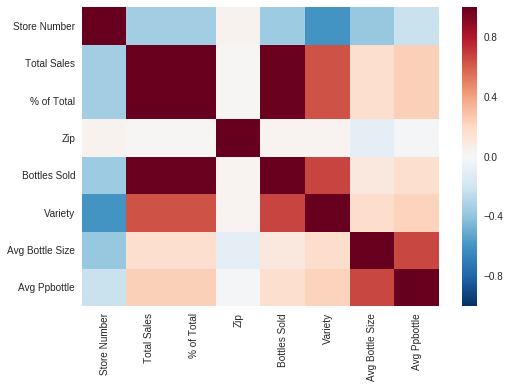

In [11]:
corr=store_sales.corr()
sns.heatmap(corr)
plt.show()

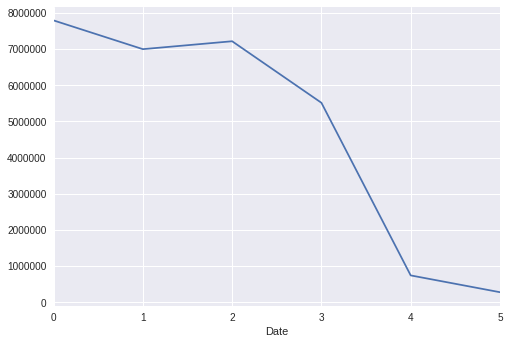

In [12]:
df_2015=df[df['Date'].dt.year==2015]
df_2015.groupby(df['Date'].dt.weekday)['Sale (Dollars)'].sum().plot()
plt.show()

In [13]:
df.groupby('Zip Code')['Sale (Dollars)'].sum().sort_values(ascending=False)
df[df['Zip Code']==50320]['Store Number'].unique()

array([2633, 3678, 4141, 4622, 2849, 4603, 4301, 4798, 4800])

In [14]:
df[df['Zip Code']==50320].groupby('Store Number')['Sale (Dollars)'].sum()

Store Number
2633    1220335.09
2849       2909.64
3678      20972.22
4141      10341.11
4301      27740.90
4603       5608.08
4622       8003.34
4798       6015.30
4800       4356.06
Name: Sale (Dollars), dtype: float64

In [15]:
df[df['Zip Code']==50314].groupby('Store Number')['Sale (Dollars)'].sum()

Store Number
2190     156204.75
3772      37031.15
4062      37648.51
4829    1089152.87
4849      15639.26
5032        793.62
Name: Sale (Dollars), dtype: float64

In [16]:
df[df['Store Number']==2633]

,Date,Store Number,City,Zip Code,County Number,County,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
39,2016-03-07,2633,DES MOINES,50320,77.0,Polk,STRAIGHT BOURBON WHISKIES,461,Wild Turkey 101,1000,16.16,24.24,12,290.88,12.00
130,2016-03-14,2633,DES MOINES,50320,77.0,Polk,DISTILLED SPIRITS SPECIALTY,381,American Born Moonshine Original,750,12.50,18.75,1,18.75,0.75
137,2015-12-17,2633,DES MOINES,50320,77.0,Polk,PUERTO RICO & VIRGIN ISLANDS RUM,55,Barton Rum Light,1000,4.00,6.00,36,216.00,36.00
164,2015-09-10,2633,DES MOINES,50320,77.0,Polk,VODKA FLAVORED,380,Uv Red (cherry) Vodka,1000,7.50,11.25,24,270.00,24.00
236,2015-01-15,2633,DES MOINES,50320,77.0,Polk,CANADIAN WHISKIES,65,Canadian Club Small Batch Classic,750,13.12,19.68,1,19.68,0.75
351,2015-03-23,2633,DES MOINES,50320,77.0,Polk,DISTILLED SPIRITS SPECIALTY,421,Tortilla Gold Dss,1000,4.51,6.77,240,1624.80,240.00
369,2015-05-22,2633,DES MOINES,50320,77.0,Polk,IMPORTED SCHNAPPS,421,Dr. Mcgillicuddy's Cherry Schnapps,1000,11.00,16.50,12,198.00,12.00
378,2015-11-19,2633,DES MOINES,50320,77.0,Polk,AMERICAN DRY GINS,380,Phillips Gin,1000,4.38,6.57,36,236.52,36.00
499,2015-02-02,2633,DES MOINES,50320,77.0,Polk,CANADIAN WHISKIES,55,Canadian Ltd Whisky,1000,5.50,8.25,12,99.00,12.00
839,2015-11-30,2633,DES MOINES,50320,77.0,Polk,SCOTCH WHISKIES,260,Scoresby Rare Scotch,1000,6.74,10.11,12,121.32,12.00


In [17]:
df[df['City']=='DES MOINES'].groupby('Store Number')['Sale (Dollars)'].sum()

Store Number
2190     156204.75
2248      82206.24
2527      66998.34
2528     138676.73
2532      64269.02
2561     182873.19
2626     108847.32
2627     102661.10
2633    1220335.09
2636      83996.93
2849       2909.64
2850       4795.06
2852       8864.17
2953       3758.06
2954      12506.57
2955       5796.19
2956       2817.78
2958       1814.86
2959       8619.44
3400      49022.43
3440        969.71
3678      20972.22
3696      16058.88
3772      37031.15
3778      13684.57
3785      16046.33
3825      22343.62
3877      15874.18
4012       1956.64
4057      57011.49
           ...    
4796       3421.32
4797       7221.30
4798       6015.30
4799       3732.27
4800       4356.06
4801      12643.95
4802      22312.26
4803      14056.02
4804      10993.44
4829    1089152.87
4849      15639.26
4889       1479.26
4926       4462.74
4942       4790.68
4974       6428.00
4997      27717.69
5032        793.62
5051       7121.72
5057       5554.18
5098      12726.78
5125      47009.36

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


Total sales peak on Monday, drop off sharply from Thursday-Friday-Saturday. No liquor sales on Sunday. <br>
State Bottle Retail is 50% higher than State Bottle Cost <br>
Iowa forces to retailers to buy their alcohol from the state at a 50% markup, each observation in our table is a purchase from a retailer <br>
Stores purchase alcohol mostly on Monday, with a decline in purchases over the week, sharp decline for Friday and Saturday <br>
Peak in liquor sales (by month) in December, spikes in June and October <br>

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

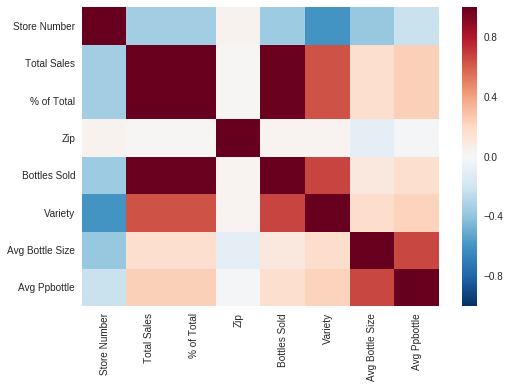

In [18]:
corr=store_sales.corr()
sns.heatmap(corr)
plt.show()

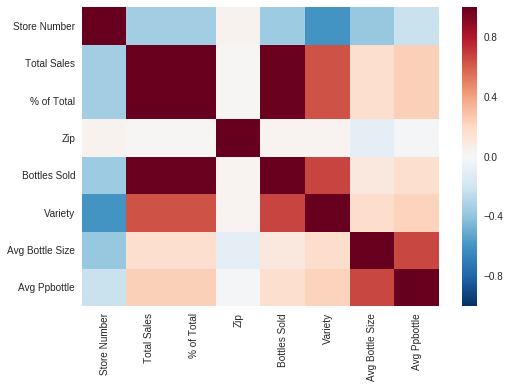

In [19]:
corr1=zip_sales.corr()
sns.heatmap(corr)
plt.show()

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [79]:
store_dummies=pd.concat([store_sales, pd.get_dummies(store_sales['Zip'])], axis=1)
store_dummies.columns
dummy_cols=list(store_dummies.columns.values)
base_zip=50314
del dummy_cols[dummy_cols.index(base_zip)]
zips_list=dummy_cols[9:]
predictors=['Bottles Sold', 'Avg Ppbottle']

In [72]:
from sklearn.model_selection import train_test_split
y=store_dummies['Total Sales'] #The variable we want to predict
X=store_dummies[predictors]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1)

In [73]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets, linear_model

lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv=5)
print "Cross-validated scores:", scores
print "Average: ", scores.mean()


Cross-validated scores: [  9.74349488e-01  -1.21568226e+16  -2.17285104e+15   9.02918920e-01
  -4.56100925e+17]
Average:  -9.40861197448e+16


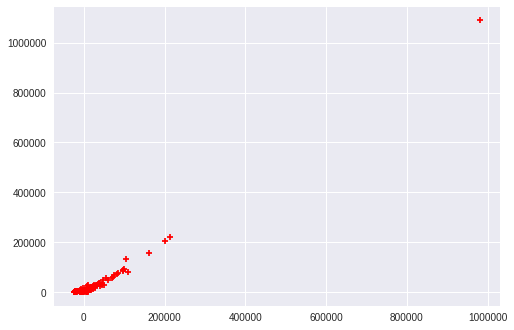

In [74]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)
model_sm = sm.OLS(y_train, X_train_sm, missing='drop').fit() ## sm.OLS(output, input)
predictions_sm = model_sm.predict(X_test_sm)
plt.clf()
plt.scatter(predictions_sm, y_test, s=30, c='r', marker='+', zorder=10)
plt.show()

In [76]:
accuracy = metrics.r2_score(y_test, predictions_sm)
print accuracy

0.97759272558


In [77]:
model_sm.summary()

/home/rb/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
/home/rb/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/rb/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/rb/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     119.4
Date:                Thu, 13 Jul 2017   Prob (F-statistic):               0.00
Time:                        13:49:19   Log-Likelihood:                -13047.
No. Observations:                1260   AIC:                         2.688e+04
Df Residuals:                     866   BIC:                         2.891e+04
Df Model:                         393                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.851e+04   4195.427     -9.180      0.000   -4.67e+04   -3.03e+04
Bottles Sold    15.1782      0.080    190.437      0.000      15.022      15.335
Avg Ppbottle  1283.4451     88.133     14.563      0.000    1110.466    1456.424
50002         2.482e+04   7680.396      3.231      0.001    9744.758    3.99e+04
50003         2.221e+04   6703.994      3.312      0.001    9047.149    3.54e+04
50006         2.224e+04   7687.491      2.893      0.004    7153.673    3.73e+04
50009          1.55e+04   5130.632      3.021      0.003    5429.638    2.56e+04
50010         2.012e+04   4593.236      4.381      0.000    1.11e+04    2.91e+04
50014         1.903e+04   6172.389      3.083      0.002    6915.885    3.11e+04
50020         2.339e+04   7681.071      3.045      0.002    8314.584    3.85e+04
50021         2.283e+04   4957.909      4.606      0.000    1.31e+04    3.26e+04
50022         2.141e+04   5381.521      3.978      0.000    1.08e+04     3.2e+04
50023         2.161e+04   5127.158      4.216      0.000    1.16e+04    3.17e+04
50025         2.374e+04   6706.356      3.540      0.000    1.06e+04    3.69e+04
50028         2.319e+04   7683.763      3.018      0.003    8106.698    3.83e+04
50033         2.271e+04   1.01e+04      2.259      0.024    2977.957    4.24e+04
50035         2.001e+04   1.01e+04      1.991      0.047     281.207    3.97e+04
50036         2.304e+04   5809.409      3.966      0.000    1.16e+04    3.44e+04
50044         2.825e+04   1.01e+04      2.809      0.005    8508.508     4.8e+04
50046         2.396e+04   1.01e+04      2.383      0.017    4228.849    4.37e+04
50047         1.807e+04   1.01e+04      1.797      0.073   -1668.655    3.78e+04
50048          2.32e+04   1.01e+04      2.308      0.021    3470.042    4.29e+04
50049         1.696e+04   7686.290      2.206      0.028    1871.129     3.2e+04
50054         2.112e+04   7680.578      2.750      0.006    6049.959    3.62e+04
50056         2.302e+04   1.01e+04      2.290      0.022    3293.399    4.28e+04
50058         2.057e+04   7687.877      2.676      0.008    5481.904    3.57e+04
50060         2.006e+04   1.01e+04      1.995      0.046     322.193    3.98e+04
50061         2.455e+04   1.01e+04      2.442      0.015    4818.393    4.43e+04
50069         2.359e+04   7680.282      3.071      0.002    8512.192    3.87e+04
50071         2.448e+04   1.01e+04      2.435      0.015    4750.528    4.42e+04
50072         2.308e+04   1.01e+04      2.296      0.022    3350.326    4.28e+04
50075         2.131e+04   1.01e+04      2.119      0.034    1574.381     4.1e+04
50076         2.424e+04   1.01e+04      2.411      0.016    4507.402     4.4e+04
50107         2.359e+04   1.01e+04      2.347      0.019    3865.088    4.33e+04
50109         -5.34e-12   1.55e-11     -0.345      0.730   -3.57e-11    2.51e-11
50111

In [78]:
model_sm.params.sort_values(ascending=False)

52401           3.544614e+04
50237           2.977949e+04
50044           2.824978e+04
50469           2.806318e+04
50320           2.799837e+04
52033           2.763126e+04
52623           2.718916e+04
50261           2.711378e+04
50541           2.700683e+04
50266           2.686856e+04
52223           2.672593e+04
50569           2.665685e+04
50542           2.661577e+04
50150           2.659489e+04
52639           2.643476e+04
52590           2.639005e+04
52337           2.597433e+04
50123           2.595670e+04
52316           2.582878e+04
50456           2.579977e+04
51551           2.578994e+04
52046           2.573624e+04
52768           2.567256e+04
50680           2.560603e+04
50136           2.556368e+04
50228           2.552272e+04
52037           2.546226e+04
50579           2.525989e+04
52248           2.518166e+04
50514           2.515246e+04
                    ...     
50310           5.547977e+03
52803           2.812019e+03
Avg Ppbottle    1.283445e+03
Bottles Sold  

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [27]:
df[df['Zip Code']==52084]

,Date,Store Number,City,Zip Code,County Number,County,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
464,2016-02-22,3805,DAVENPORT,52084,82.0,Scott,SPICED RUM,260,Captain Morgan Original Spiced,750,9.00,13.50,12,162.00,9.00
655,2015-06-01,3805,DAVENPORT,52084,82.0,Scott,IMPORTED GRAPE BRANDIES,420,Hennessy VS,375,9.99,14.99,24,359.76,9.00
1212,2015-04-06,3805,DAVENPORT,52084,82.0,Scott,TEQUILA,370,Avion Silver,375,11.97,17.96,12,215.52,4.50
1253,2016-03-07,3805,DAVENPORT,52084,82.0,Scott,AMERICAN GRAPE BRANDIES,205,E & J Vsop Superior Reserve,200,2.49,3.74,24,89.76,4.80
2870,2016-03-07,3805,DAVENPORT,52084,82.0,Scott,VODKA FLAVORED,205,New Amsterdam Peach,750,6.90,10.35,12,124.20,9.00
2974,2015-07-20,3805,DAVENPORT,52084,82.0,Scott,IMPORTED VODKA - MISC,260,Ciroc Red Berry,200,5.00,7.50,24,180.00,4.80
4155,2015-04-20,3805,DAVENPORT,52084,82.0,Scott,VODKA 80 PROOF,205,New Amsterdam Vodka Mini,500,5.54,8.31,2,16.62,1.00
4871,2015-09-28,3805,DAVENPORT,52084,82.0,Scott,IMPORTED VODKA - MISC,260,Ciroc Amaretto,200,5.00,7.50,5,37.50,1.00
4938,2015-10-05,3805,DAVENPORT,52084,82.0,Scott,VODKA FLAVORED,260,Smirnoff Pineapple,750,8.25,12.38,1,12.38,0.75
6846,2015-05-11,3805,DAVENPORT,52084,82.0,Scott,CREAM LIQUEURS,305,Rumchata,375,7.42,11.13,3,33.39,1.12


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [28]:
zip_sales[zip_sales['Zip Code']==52084]

,Zip Code,Total Sales,Median Sales Nearby,Total Sales Nearby,Avg Sales Nearby,# Stores Nearby,Avg Price Per Bottle,# Bottles Sold
127,52084,47758.4,47758.4,47758.4,47758.4,1,8.151289,5859


In [62]:
X_train

,Bottles Sold,Avg Ppbottle,50002,50003,50006,50009,50010,50014,50020,50021,...,52776,52777,52778,52801,52802,52803,52804,52806,52807,56201
683,1041,8.543785,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,300,21.450000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,5004,14.449412,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
963,440,10.740568,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1036,396,10.124369,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,506,17.275375,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,3971,8.221184,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
949,375,12.947707,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,2016,14.184415,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,3620,14.228282,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X_train.shape
y_train.shape

(140, 416)

In [55]:
X_test.shape
y_test.shape

(140,)

In [63]:
y_train

683       8894.08
828       6435.00
105      72304.86
963       4725.85
1036      4009.25
696       8741.34
242      32646.32
949       4855.39
280      28595.78
153      51506.38
914       5254.75
775       7321.28
522      13136.47
324      24681.39
246      32293.18
471      15485.26
96       78317.59
1330      1037.64
593      11131.57
1368       525.00
521      13153.73
1103      3404.52
491      14468.36
1377       407.61
113      66998.34
143      56709.60
1347       806.37
658       9385.27
523      13050.07
316      25619.10
          ...    
1251      2002.20
321      24841.86
791       6936.52
347      23067.94
1137      3116.79
1080      3602.04
1352       704.36
142      57011.49
1351       727.15
42      145849.79
1065      3744.67
900       5456.39
1291      1586.40
769       7416.46
532      12769.22
627      10117.96
859       5993.48
923       5164.76
1257      1956.64
468      15557.32
745       7924.32
424      17926.87
1337       921.36
202      38036.20
771       

In [80]:
store_sales[store_sales['Zip']==52411]

,Store Number,Total Sales,% of Total,Zip,Bottles Sold,Variety,Avg Bottle Size,Best Seller,Avg Ppbottle
49,2647,133543.9,0.382354,52411,8072,550,986.855798,Pinnacle Vodka,16.544091
